In [40]:
import numpy as np
import matplotlib.pyplot as plt
import time

## AdaBoost
We will use the Wisconsin breast cancer data set.
For each depth in 1, . . . , 5, instantiate an AdaBoost classifier with the base learner set to be
a decision tree of that depth, and then record the 10-fold cross-validated error on the entire
breast cancer data set. Plot the resulting curve of accuracy against base classifier depth.

In [48]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [49]:
# Step 1: Load the data
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Using $1$ as your random state for both the base learner as well as the AdaBoost classifier every time.

In [ ]:
# Step 2: Instantiate classifiers and record errors
depths = range(1, 6)
cv_errors = []

for depth in depths:
    # Instantiate a Decision Tree classifier with the current depth
    base_estimator = DecisionTreeClassifier(max_depth=depth, random_state=1)
    
    # Instantiate an AdaBoost classifier using the Decision Tree as the base estimator
    ada_boost_clf = AdaBoostClassifier(
        base_estimator=base_estimator, 
        n_estimators=10, 
        learning_rate=1, 
        random_state=1
    )
    
    # Step 3: Compute the 10-fold cross-validated error using the entire dataset
    cv_scores = cross_val_score(ada_boost_clf, X, y, cv=10)
    
    # Record the mean of the cross-validated scores
    cv_errors.append(1 - cv_scores.mean())


In [56]:
# Print the cross-validated errors
for depth, cv_error in zip(depths, cv_errors):
    print(f"Depth: {depth}, Cross-Validated Error: {cv_error:.4f}")


Depth: 1, Cross-Validated Error: 0.0545
Depth: 2, Cross-Validated Error: 0.0597
Depth: 3, Cross-Validated Error: 0.0616
Depth: 4, Cross-Validated Error: 0.0386
Depth: 5, Cross-Validated Error: 0.0527


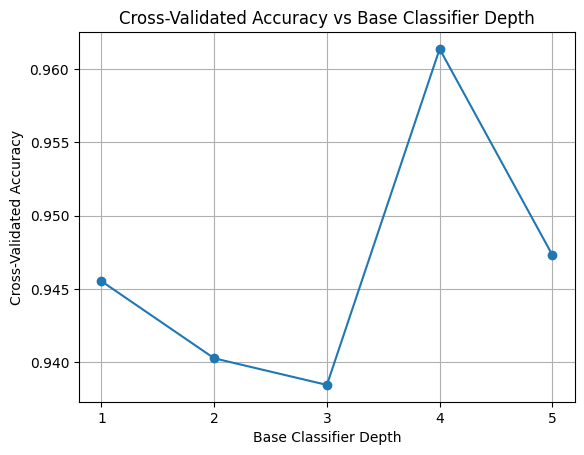

In [59]:
# Step 4: Plot the cross-validated accuracy against the base classifier depth
# Calculating cross-validated accuracy from the recorded errors:
cv_accuracies = [1 - error for error in cv_errors]

# Plot the cross-validated accuracy against the base classifier depth:
plt.figure()
plt.plot(depths, cv_accuracies, marker='o')
plt.xlabel('Base Classifier Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs Base Classifier Depth')
plt.grid(True)
plt.xticks(depths)
plt.show()
